In [1]:
import warnings
warnings.filterwarnings("ignore")
# Libraries to read and manipulate data
import pandas as pd
import numpy as np

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
data = pd.read_csv('../Resources/new_games.csv')
# copying data to preserve original
games_data = data.copy()

In [3]:
games_data.head()

,Unnamed: 0,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,0,2022-03-12,1610612748,1610612750,104.000,0.398,0.760,0.333,23.000,53.000,113.000,0.422,0.875,0.357,21.000,46.000,0
1,1,2022-03-12,1610612741,1610612739,101.000,0.443,0.933,0.429,20.000,46.000,91.000,0.419,0.824,0.208,19.000,40.000,1
2,2,2022-03-12,1610612759,1610612754,108.000,0.412,0.813,0.324,28.000,52.000,119.000,0.489,1.000,0.389,23.000,47.000,0
3,3,2022-03-12,1610612744,1610612749,122.000,0.484,0.933,0.400,33.000,55.000,109.000,0.413,0.696,0.386,27.000,39.000,1
4,4,2022-03-12,1610612743,1610612761,115.000,0.551,0.750,0.407,32.000,39.000,127.000,0.471,0.760,0.387,28.000,50.000,0


In [4]:
#check for nulls
games_data.isna().sum()

Unnamed: 0          0
GAME_DATE_EST       0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
PTS_home           99
FG_PCT_home        99
FT_PCT_home        99
FG3_PCT_home       99
AST_home           99
REB_home           99
PTS_away           99
FG_PCT_away        99
FT_PCT_away        99
FG3_PCT_away       99
AST_away           99
REB_away           99
HOME_TEAM_WINS      0
dtype: int64

In [5]:
games_data = games_data.dropna()

In [6]:
games_data.isna().sum()

Unnamed: 0         0
GAME_DATE_EST      0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

In [7]:
X = games_data.drop(['HOME_TEAM_WINS', 'GAME_DATE_EST', 'Unnamed: 0', 'PTS_home', 'PTS_away','HOME_TEAM_ID','VISITOR_TEAM_ID'],axis=1)
y = games_data['HOME_TEAM_WINS']

In [8]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, stratify=y)
print(X_train.shape, X_test.shape)

(19272, 10) (6425, 10)


In [9]:
# Use Scaler
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# The Important Part:
Uncomment with (ctrl + /) for hyperparameter tuning.
These are the predictive models for categories.

In [11]:
class decisiontree:
    name = "Decision Tree Classifier"
    model = DecisionTreeClassifier(random_state=1)
class bagging:
    name = "Bagging Classifier"
    model = BaggingClassifier(random_state=1)
class logitreg:
    name = "Logistic Regression Classifier"
    model = LogisticRegression(solver='lbfgs', random_state=1)
class randiforestclass:
    name = "Random Forest Classifier"
    model = RandomForestClassifier(random_state=1)
class adaboost:
    name = "AdaBoost Classifier"
    model = AdaBoostClassifier(random_state=1)
class gradientboost:
    name = "Gradient Boosting Classifier"
    model = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
class xgboost:
    name = "Extreme Gradient Boosting Classifier"
    model = XGBClassifier(random_state=1,eval_metric='logloss')
class_list = [decisiontree, bagging, logitreg, randiforestclass, adaboost, gradientboost, xgboost]

In [12]:
# Functions on Functions on Functions
def buildmodel(model_class,xtrn,ytrn,xtst):
    # Using the model classes and specifically the model variable this will fit the training and make the prediction using 
    # the x testing set
    model_class.model.fit(xtrn,ytrn)
    model_class.y_predict = model_class.model.predict(xtst)
    print("Model build and fitted :)")
    
def metricsomania(model_class,train,test,train_y,test_y,flag=True):
    # Use the model class, the model variable of said class, and the y predictions
    # defining an empty list to store train and test results
    # Will also create a list of the scores and put the list into the class.
    model = model_class.model
    score_list=[] 
    # Including the Testing set to see how overfitting may be influencing the model.
    pred_train = model.predict(train)
    pred_test = model_class.y_predict
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
    if len(score_list) == 0:
        flag = False
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    # If the flag is not True, god help us
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    model_class.scores = score_list
    return score_list # returning the list with train and test scores

def make_confusion_matrix(model_class,y_actual,labels=[1, 0]):
    # Make a confusion matrix with a seaborn heatmap and display it.
    model = model_class.model
    cm=metrics.confusion_matrix( y_actual, model_class.y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def Everything_Everywhere_All_At_Once(model_class,xtrn,ytrn,xtst,ytst):
    # Run all of the other functions to reduce the code needed to do it all (yes I'm that lazy)
    print(f"Model creation, fitting, and assesment of the {model_class.name} model:")
    buildmodel(model_class,xtrn,ytrn,xtst)
    print("-"*50)
    metricsomania(model_class,xtrn,xtst,ytrn,ytst)
    make_confusion_matrix(model_class,ytst)
    print("-"*50)

Model creation, fitting, and assesment of the Decision Tree Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  1.0
Accuracy on test set :  0.7632684824902723
Recall on training set :  1.0
Recall on test set :  0.8017946687780417
Precision on training set :  1.0
Precision on test set :  0.7977941176470589
--------------------------------------------------


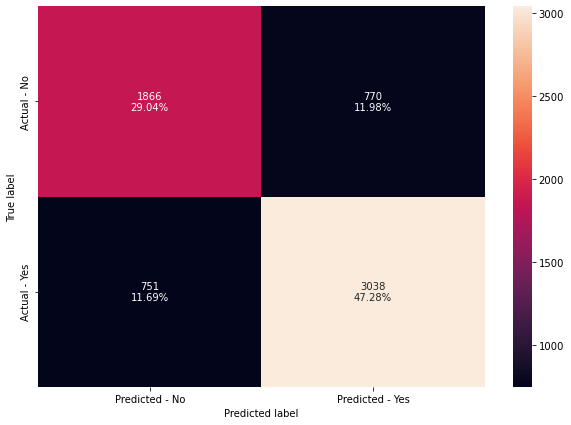

In [13]:
Everything_Everywhere_All_At_Once(decisiontree,X_train_scaled,y_train,X_test_scaled,y_test)

Model creation, fitting, and assesment of the Bagging Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.9912826899128269
Accuracy on test set :  0.8124513618677043
Recall on training set :  0.9891782509238078
Recall on test set :  0.8218527315914489
Precision on training set :  0.9960134656272147
Precision on test set :  0.8545554335894622
--------------------------------------------------


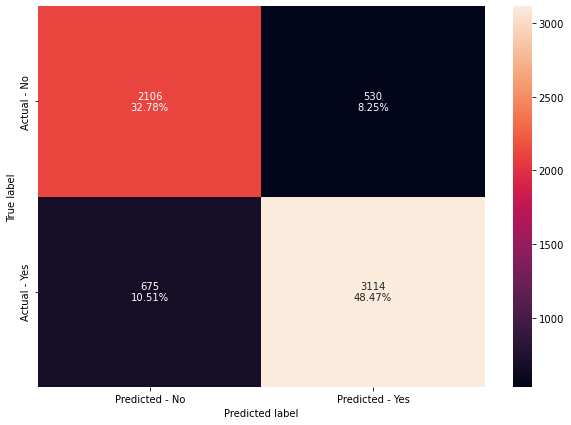

In [14]:
Everything_Everywhere_All_At_Once(bagging,X_train_scaled,y_train,X_test_scaled,y_test)

Model creation, fitting, and assesment of the Logistic Regression Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.843192195931922
Accuracy on test set :  0.8375097276264591
Recall on training set :  0.8768256202709837
Recall on test set :  0.8717339667458432
Precision on training set :  0.860027614773904
Precision on test set :  0.8554778554778555
--------------------------------------------------


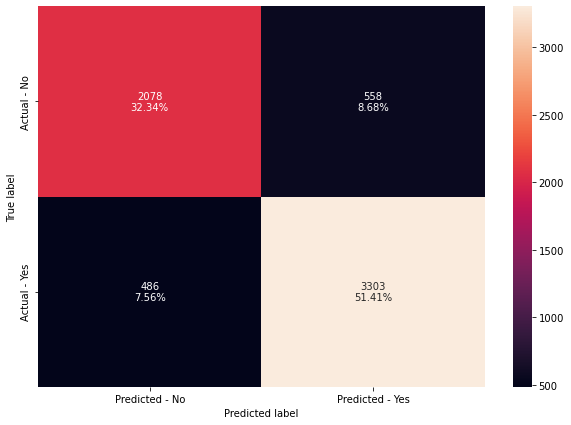

In [15]:
Everything_Everywhere_All_At_Once(logitreg,X_train_scaled,y_train,X_test_scaled,y_test)

Model creation, fitting, and assesment of the Random Forest Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  1.0
Accuracy on test set :  0.831284046692607
Recall on training set :  1.0
Recall on test set :  0.867247294800739
Precision on training set :  1.0
Precision on test set :  0.8497543315231445
--------------------------------------------------


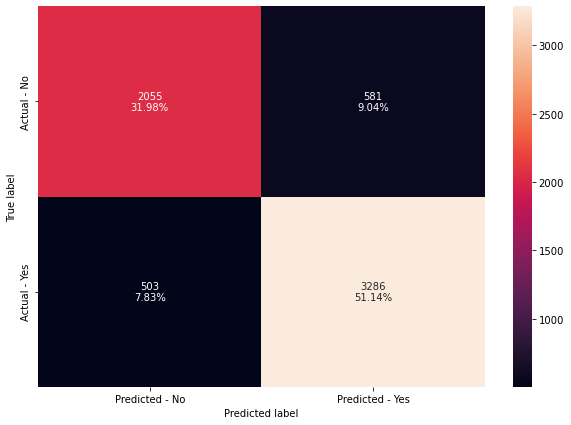

In [16]:
Everything_Everywhere_All_At_Once(randiforestclass,X_train_scaled,y_train,X_test_scaled,y_test)

Model creation, fitting, and assesment of the AdaBoost Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.8401307596513076
Accuracy on test set :  0.829260700389105
Recall on training set :  0.8732183705789196
Recall on test set :  0.8651359197677487
Precision on training set :  0.8581928231733679
Precision on test set :  0.848343685300207
--------------------------------------------------


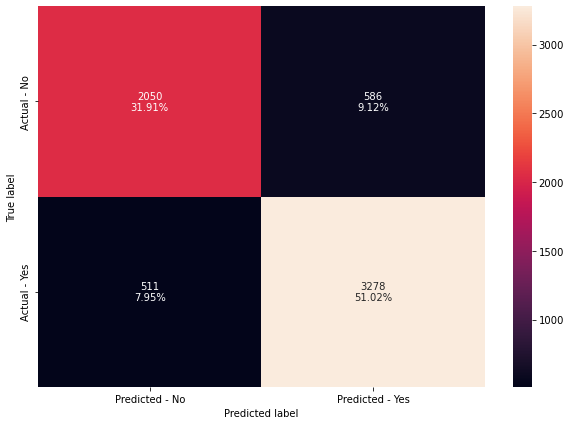

In [17]:
Everything_Everywhere_All_At_Once(adaboost,X_train_scaled,y_train,X_test_scaled,y_test)

Model creation, fitting, and assesment of the Gradient Boosting Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.8537256122872561
Accuracy on test set :  0.8345525291828794
Recall on training set :  0.888879113144466
Recall on test set :  0.8764845605700713
Precision on training set :  0.8665408697143837
Precision on test set :  0.8480592441266599
--------------------------------------------------


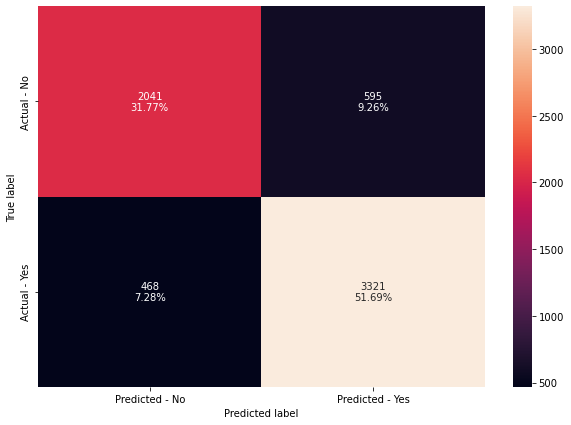

In [18]:
Everything_Everywhere_All_At_Once(gradientboost,X_train_scaled,y_train,X_test_scaled,y_test)

Model creation, fitting, and assesment of the Extreme Gradient Boosting Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.9309879618098796
Accuracy on test set :  0.8300389105058366
Recall on training set :  0.9479148337145874
Recall on test set :  0.8622327790973872
Precision on training set :  0.9358929812369701
Precision on test set :  0.8514464425332291
--------------------------------------------------


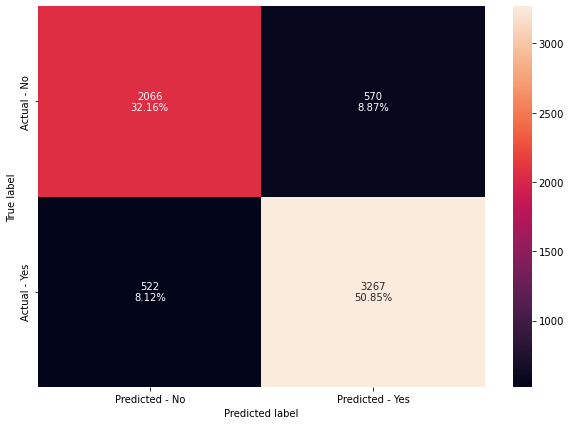

In [19]:
Everything_Everywhere_All_At_Once(xgboost,X_train_scaled,y_train,X_test_scaled,y_test)

In [20]:
model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
for model_class in class_list:
    model_names.append(model_class.name)
    acc_train.append(model_class.scores[0])
    acc_test.append(model_class.scores[1])
    recall_train.append(model_class.scores[2])
    recall_test.append(model_class.scores[3])
    precision_train.append(model_class.scores[4])
    precision_test.append(model_class.scores[5])

In [21]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)
#comparison_frame.sort_values(by='Test_Accuracy')
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree Classifier,1.000,0.763,1.000,0.802,1.000,0.798
1,Bagging Classifier,0.991,0.812,0.989,0.822,0.996,0.855
2,Logistic Regression Classifier,0.843,0.838,0.877,0.872,0.860,0.855
3,Random Forest Classifier,1.000,0.831,1.000,0.867,1.000,0.850
4,AdaBoost Classifier,0.840,0.829,0.873,0.865,0.858,0.848
5,Gradient Boosting Classifier,0.854,0.835,0.889,0.876,0.867,0.848
6,Extreme Gradient Boosting Classifier,0.931,0.830,0.948,0.862,0.936,0.851


In [22]:
comparison_frame.sort_values(by=['Test_Accuracy'], inplace=True, ascending=False)
comparison_frame.reset_index(inplace=True,drop=True)
#comparison_frame.drop('index')
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression Classifier,0.843,0.838,0.877,0.872,0.860,0.855
1,Gradient Boosting Classifier,0.854,0.835,0.889,0.876,0.867,0.848
2,Random Forest Classifier,1.000,0.831,1.000,0.867,1.000,0.850
3,Extreme Gradient Boosting Classifier,0.931,0.830,0.948,0.862,0.936,0.851
4,AdaBoost Classifier,0.840,0.829,0.873,0.865,0.858,0.848
5,Bagging Classifier,0.991,0.812,0.989,0.822,0.996,0.855
6,Decision Tree Classifier,1.000,0.763,1.000,0.802,1.000,0.798


In [23]:
top_name = comparison_frame['Model'][0]
second_best = comparison_frame['Model'][1]
third_best = comparison_frame['Model'][2]
print(f"Best model is the {top_name} model\n"
     f"Second best model is the {second_best} model\n"
     f"Third best model is the {third_best} model")

Best model is the Logistic Regression Classifier model
Second best model is the Gradient Boosting Classifier model
Third best model is the Random Forest Classifier model


### Hyperparameter Tuning

#### To my teammates:
Gridsearch is a tool used to bruteforce search a matrix of hyperparameters for a model. The model will be optimized to the training set so overfitting is a risk. However, in my experience a tuned model is very powerful so we'll see how effective this is.

In [24]:
# # Creating pipeline
# pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# # Parameter grid to pass in GridSearchCV

# param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
#               'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
#               'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
#               'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
#              }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.accuracy_score)

# # Calling GridSearchCV
# grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# # Fitting parameters in GridSeachCV
# grid_cv.fit(X_train_scaled, y_train)

# print(
#     "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
# )

Model creation, fitting, and assesment of the Tuned Decision Tree Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.7971149854711499
Accuracy on test set :  0.7898832684824902
Recall on training set :  0.8684673587893718
Recall on test set :  0.8677751385589866
Precision on training set :  0.8034348038417711
Precision on test set :  0.794778825235678
--------------------------------------------------


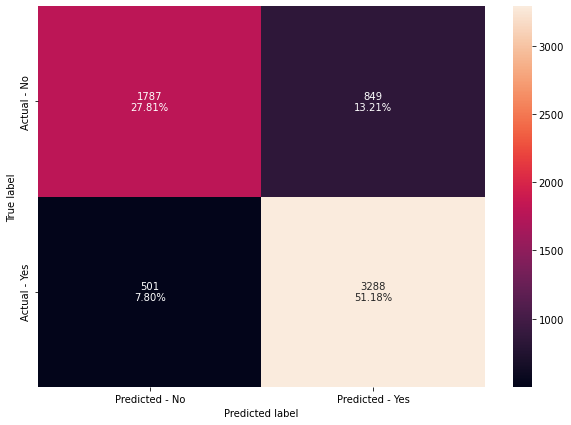

In [25]:
class tuned_decision_tree:
    name = "Tuned Decision Tree Classifier"
tuned_decision_tree.model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=6,
        max_leaf_nodes=15,
        random_state=1,
        min_impurity_decrease=0.0001,
        min_samples_leaf=1
    ),
)
class_list.append(tuned_decision_tree)
Everything_Everywhere_All_At_Once(tuned_decision_tree,X_train_scaled,y_train,X_test_scaled,y_test)

In [26]:
# # Creating pipeline
# pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# # Parameter grid to pass in GridSearchCV

# param_grid = {
#               'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
#               'baggingclassifier__max_features': [0.7,0.8,0.9,1],
#               'baggingclassifier__n_estimators' : [10,20,30,40,50],
#              }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.accuracy_score)

# # Calling GridSearchCV
# grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# # Fitting parameters in GridSeachCV
# grid_cv.fit(X_train_scaled, y_train)

# print(
#     "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
# )

Model creation, fitting, and assesment of the Tuned Bagging Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.9993773349937733
Accuracy on test set :  0.8300389105058366
Recall on training set :  0.9996480732007742
Recall on test set :  0.8611770915808921
Precision on training set :  0.9992963940193491
Precision on test set :  0.8521807260381301
--------------------------------------------------


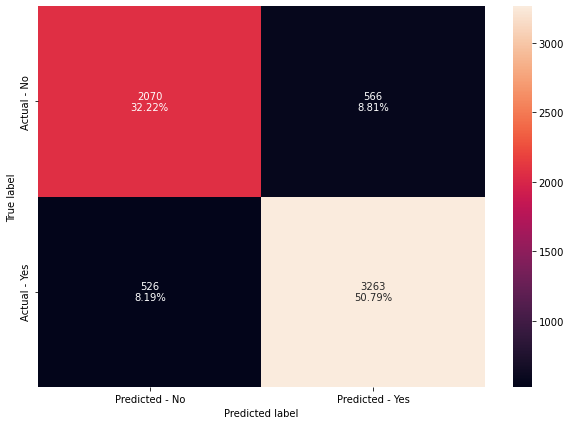

In [27]:
class tuned_bagging:
    name = "Tuned Bagging Classifier"
tuned_bagging.model = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.8,
        max_samples=0.9,
        random_state=1,
        n_estimators=50,
    ),
)
class_list.append(tuned_bagging)
Everything_Everywhere_All_At_Once(tuned_bagging,X_train_scaled,y_train,X_test_scaled,y_test)

In [28]:
class tuned_randiforestclass:
    name = "Tuned Random Forest Classifier"
# # Creating pipeline
# pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# # Parameter grid to pass in GridSearchCV

# param_grid = {
#     "randomforestclassifier__n_estimators": [100,150,250],
#     "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
#     "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
#     "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
# }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.accuracy_score)

# # Calling GridSearchCV
# grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# # Fitting parameters in GridSeachCV
# grid_cv.fit(X_train_scaled, y_train)

# print(
#     "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
# )

Model creation, fitting, and assesment of the Tuned Random Forest Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.8981423827314239
Accuracy on test set :  0.8298832684824903
Recall on training set :  0.9252155551645258
Recall on test set :  0.8738453417788334
Precision on training set :  0.9042909966463153
Precision on test set :  0.8433520122261844
--------------------------------------------------


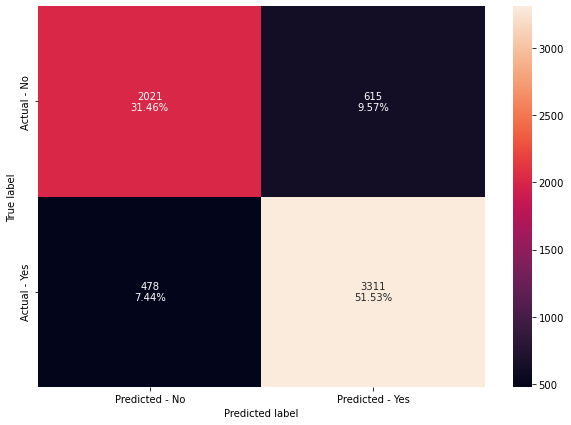

In [29]:
tuned_randiforestclass.model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        random_state=1,
        max_samples=0.4,
        min_samples_leaf=4
    ),
)
class_list.append(tuned_randiforestclass)
Everything_Everywhere_All_At_Once(tuned_randiforestclass,X_train_scaled,y_train,X_test_scaled,y_test)

In [30]:
# # Creating pipeline
# pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# # Parameter grid to pass in GridSearchCV
# param_grid = {
#     "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
#     "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
#     "adaboostclassifier__base_estimator": [
#         DecisionTreeClassifier(max_depth=1, random_state=1),
#         DecisionTreeClassifier(max_depth=2, random_state=1),
#         DecisionTreeClassifier(max_depth=3, random_state=1),
#     ],
# }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.accuracy_score)

# # Calling GridSearchCV
# grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# # Fitting parameters in GridSeachCV
# grid_cv.fit(X_train_scaled, y_train)

# print(
#     "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
# )

Model creation, fitting, and assesment of the Tuned AdaBoost Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.8494707347447074
Accuracy on test set :  0.8367315175097276
Recall on training set :  0.8838641562554989
Recall on test set :  0.8727896542623383
Precision on training set :  0.8640233938247184
Precision on test set :  0.8536396489416623
--------------------------------------------------


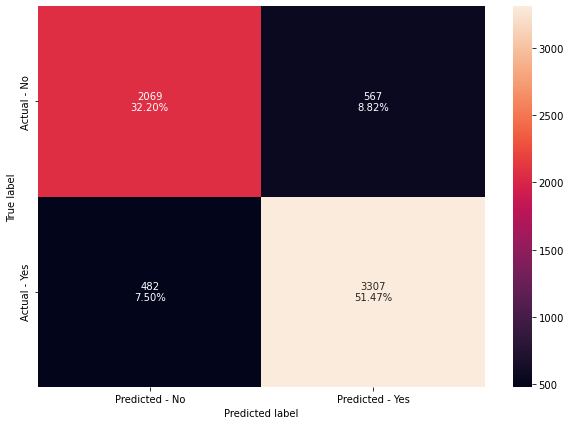

In [31]:
class tuned_adaboost:
    name = "Tuned AdaBoost Classifier"
tuned_adaboost.model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=0.2,
        random_state=1,
    ),
)
class_list.append(tuned_adaboost)
Everything_Everywhere_All_At_Once(tuned_adaboost,X_train_scaled,y_train,X_test_scaled,y_test)

In [32]:
# # Creating pipeline
# pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# # Parameter grid to pass in GridSearchCV
# param_grid = {
#     "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
#     "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
#     "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
#     "gradientboostingclassifier__subsample":[0.5,0.7,1],
#     "gradientboostingclassifier__max_features":[0.5,0.7,1],
# }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.accuracy_score)

# # Calling GridSearchCV
# grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# # Fitting parameters in GridSeachCV
# grid_cv.fit(X_train_scaled, y_train)

# print(
#     "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
# )

Model creation, fitting, and assesment of the Tuned Gradient Boosting Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.8632212536322126
Accuracy on test set :  0.8336186770428016
Recall on training set :  0.893894070033433
Recall on test set :  0.8712061229875957
Precision on training set :  0.8766177739430544
Precision on test set :  0.8503348789283874
--------------------------------------------------


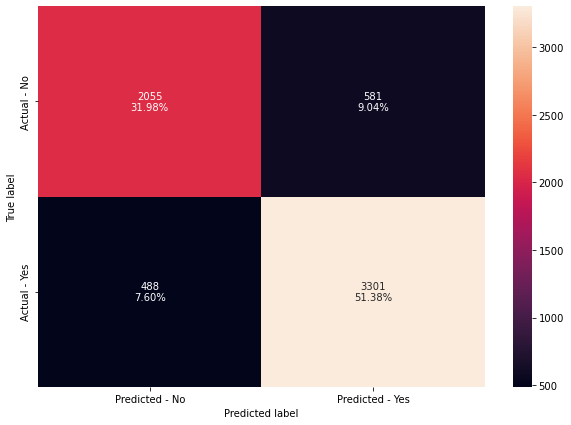

In [33]:
class tuned_gradientboost:
    name = "Tuned Gradient Boosting Classifier"
tuned_gradientboost.model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        learning_rate=0.2,
        max_features=0.7,
        n_estimators=125,
        subsample=1,
        random_state=1,
    ),
)
class_list.append(tuned_gradientboost)
Everything_Everywhere_All_At_Once(tuned_gradientboost,X_train_scaled,y_train,X_test_scaled,y_test)

In [34]:
# #Creating pipeline
# pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

# #Parameter grid to pass in GridSearchCV
# param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
#             'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
#             'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.accuracy_score)

# # Calling GridSearchCV
# grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# # Fitting parameters in GridSeachCV
# grid_cv.fit(X_train_scaled, y_train)

# print(
#     "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
# )

Model creation, fitting, and assesment of the Tuned Extreme Gradient Boosting Classifier model:
Model build and fitted :)
--------------------------------------------------
Accuracy on training set :  0.8769198837691988
Accuracy on test set :  0.8371984435797666
Recall on training set :  0.9038360021115608
Recall on test set :  0.8683029823172341
Precision on training set :  0.8892832409972299
Precision on test set :  0.8574407088871514
--------------------------------------------------


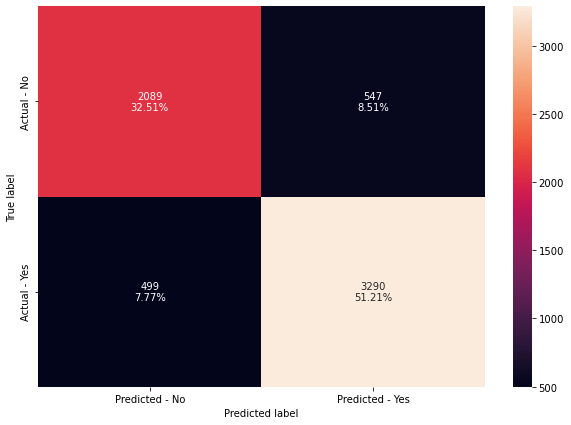

In [35]:
class tuned_xgboost:
    name = "Tuned Extreme Gradient Boosting Classifier"
tuned_xgboost.model = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=200,
        scale_pos_weight=1,
        subsample=0.7,
        learning_rate=0.05,
        gamma=5,
        eval_metric='logloss',
    ),
)
class_list.append(tuned_xgboost)
Everything_Everywhere_All_At_Once(tuned_xgboost,X_train_scaled,y_train,X_test_scaled,y_test)

In [36]:
model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
for model_class in class_list:
    model_names.append(model_class.name)
    acc_train.append(model_class.scores[0])
    acc_test.append(model_class.scores[1])
    recall_train.append(model_class.scores[2])
    recall_test.append(model_class.scores[3])
    precision_train.append(model_class.scores[4])
    precision_test.append(model_class.scores[5])

In [37]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)
comparison_frame.sort_values(by='Test_Accuracy')
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree Classifier,1.000,0.763,1.000,0.802,1.000,0.798
1,Bagging Classifier,0.991,0.812,0.989,0.822,0.996,0.855
2,Logistic Regression Classifier,0.843,0.838,0.877,0.872,0.860,0.855
3,Random Forest Classifier,1.000,0.831,1.000,0.867,1.000,0.850
4,AdaBoost Classifier,0.840,0.829,0.873,0.865,0.858,0.848
5,Gradient Boosting Classifier,0.854,0.835,0.889,0.876,0.867,0.848
6,Extreme Gradient Boosting Classifier,0.931,0.830,0.948,0.862,0.936,0.851
7,Tuned Decision Tree Classifier,0.797,0.790,0.868,0.868,0.803,0.795
8,Tuned Bagging Classifier,0.999,0.830,1.000,0.861,0.999,0.852
9,Tuned Random Forest Classifier,0.898,0.830,0.925,0.874,0.904,0.843


In [38]:
comparison_frame.sort_values(by=['Test_Accuracy'], inplace=True, ascending=False)
comparison_frame.reset_index(inplace=True,drop=True)
#comparison_frame.drop('index')
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression Classifier,0.843,0.838,0.877,0.872,0.860,0.855
1,Tuned Extreme Gradient Boosting Classifier,0.877,0.837,0.904,0.868,0.889,0.857
2,Tuned AdaBoost Classifier,0.849,0.837,0.884,0.873,0.864,0.854
3,Gradient Boosting Classifier,0.854,0.835,0.889,0.876,0.867,0.848
4,Tuned Gradient Boosting Classifier,0.863,0.834,0.894,0.871,0.877,0.850
5,Random Forest Classifier,1.000,0.831,1.000,0.867,1.000,0.850
6,Extreme Gradient Boosting Classifier,0.931,0.830,0.948,0.862,0.936,0.851
7,Tuned Bagging Classifier,0.999,0.830,1.000,0.861,0.999,0.852
8,Tuned Random Forest Classifier,0.898,0.830,0.925,0.874,0.904,0.843
9,AdaBoost Classifier,0.840,0.829,0.873,0.865,0.858,0.848


In [39]:
top_name = comparison_frame['Model'][0]
second_best = comparison_frame['Model'][1]
third_best = comparison_frame['Model'][2]
print(f"Best model is the {top_name} model\n"
     f"Second best model is the {second_best} model\n"
     f"Third best model is the {third_best} model")

Best model is the Logistic Regression Classifier model
Second best model is the Tuned Extreme Gradient Boosting Classifier model
Third best model is the Tuned AdaBoost Classifier model


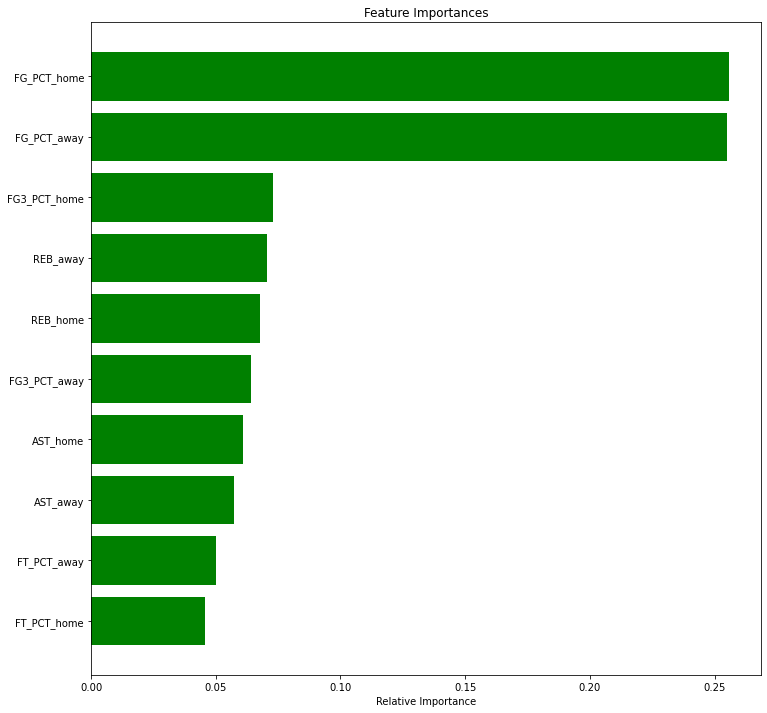

In [40]:
#example of feature importance.
feature_names = X_train.columns
importances = tuned_xgboost.model[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()